In [ ]:
#Insurance FORECAST PROJECTS 

INSURANCE FORECAST PROJECTS  

PROJECT OVERVIEW <br>

Regression Project for Medical Insurance Forecast aims to predict individual medical costs billed by health insurance based on various independent variables from the dataset. By utilizing polynomial regression, the project seeks to accurately model the relationship between these variables and the medical costs. Features include data preprocessing, model training, and evaluation to predict costs effectively. This project addresses the need for accurate forecasting of medical expenses, assisting insurance companies in budgeting and individuals in planning their healthcare expenses.

OBJECTIVES OF THE PROJECT <br>


The objective of the Regression Project for Medical Insurance Forecast is to develop a predictive model that accurately estimates the medical costs billed by health insurance for individuals based on various independent variables. By leveraging regression analysis, the project aims to identify key factors influencing medical costs and their respective impacts. Through thorough data exploration, model training, and evaluation, the project seeks to provide insights for insurers to better assess risk and for individuals to plan for healthcare expenses effectively. Ultimately, the project aims to enhance cost estimation accuracy and inform decision-making in the healthcare industry.

Explanation of the Columns: <br>

Age: This column represents the age of the individuals for whom the medical insurance data is recorded. Age is a crucial factor in determining insurance premiums, as older individuals may typically face higher healthcare costs due to age-related health issues. <br>

Sex: This column indicates the gender of the individuals, typically categorized as male or female. Gender may influence insurance premiums, as certain medical conditions or risk factors may vary between sexes, leading to differences in healthcare costs. <br>

BMI (Body Mass Index): BMI is a measure of body fat based on height and weight. This column records the BMI of the individuals, which is often used by insurers to assess health risk. Higher BMI values may indicate obesity, which can lead to various health complications and potentially higher medical costs. <br>

Children: This column specifies the number of children/dependents covered by the insurance policy. The presence of children in the insured individual's family may impact insurance premiums, as additional dependents may increase healthcare expenses.<br>

Smoker: This column indicates whether the individual is a smoker or a non-smoker. Smoking is a significant risk factor for various health conditions, including cardiovascular diseases and cancer, leading to higher healthcare costs for smokers compared to non-smokers.<br>

Region: This column denotes the geographic region where the individual resides. Regional differences in healthcare infrastructure, access to healthcare services, and cost of living can influence insurance premiums. <br>

Charges: This column represents the medical charges billed by health insurance for the individuals. It is the target variable that the regression model aims to predict based on the other independent variables such as age, sex, BMI, etc. These charges encompass various healthcare expenses, including hospitalization, treatments, medications, and other medical services. <br>


STEPS FOR THE PROJECTS <br>
 1 Data collection and importation <br>
 2 Data cleaning <br>
 3 Data exploratory Analysis <br>
 4 Data Preprocessing <br>
 5 Feature Selection <br>
 6 Data evaluation  <br>
 7 Data Deployment  <br>

In [12]:
#importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')


In [7]:
#importing the Dataset 
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#Data Consistency 
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
data.shape

(1338, 7)

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


DATA EXPLORATORY ANALYSIS

In [14]:
#The sex that has the most charges
sel = data.groupby('sex')[['charges']].sum().sort_values(ascending = False, by = 'charges')
px.bar(data_frame = sel, x = sel.index, y = 'charges', title = 'Sex with the Most Charges', color = 'charges')


In [18]:
#The region area with their average charges 
sel = data.groupby('region')[['charges']].mean().sort_values(ascending = False, by = 'charges')
px.bar(data_frame = sel, x = sel.index, y = 'charges', title = 'The Region with their average Charges', color = 'charges')


In [20]:
#what segment of smoker with the highest charges
sel = data.groupby('smoker')[['charges']].sum().sort_values(ascending = False, by = 'charges' )
px.pie(data_frame = sel, names = sel.index, values = 'charges', hole = 0.4, title = 'Smokers with Highest charges')


In [21]:
#What region has the most charges for males that do smokes
da = data.loc[(data['sex'] == 'male') & (data['smoker'] == 'yes')]
sel = da.groupby('region')[['charges']].sum().sort_values(ascending = False, by = 'charges')
px.bar(data_frame = sel, x = sel.index, y = 'charges', title = 'Region that has most charges for males that smoke', color = 'charges')

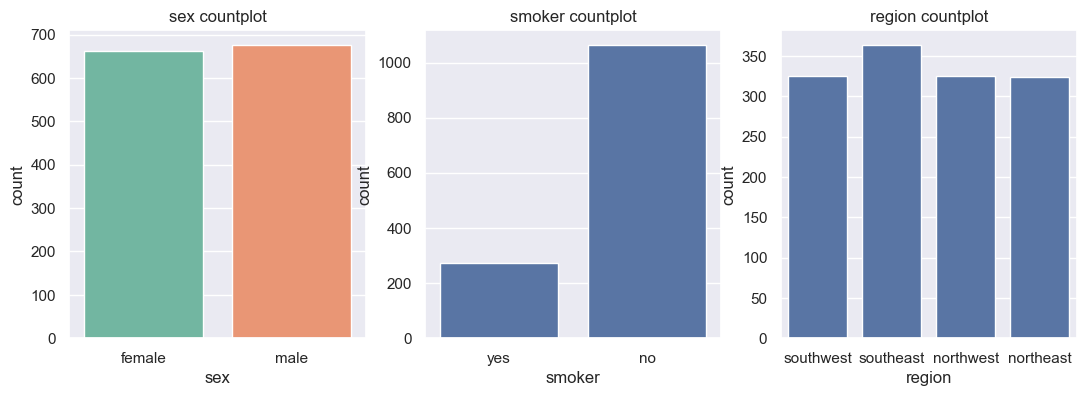

In [24]:
# Distribution of the categorical column:
cat = data.select_dtypes(exclude = 'number')
num = data.select_dtypes(include = 'number')

def plotter(dataframe, a, b, c):
    plt.figure(figsize= (13, 4))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.countplot(x = data[a], palette='Set2')
    plt.title(f'{a} countplot')

    plt.subplot(1, 3, 2)
    sns.countplot(x = data[b])
    plt.title(f'{b} countplot')

    plt.subplot(1, 3, 3)
    sns.countplot(x = data[c])
    plt.title(f'{c} countplot')




plotter(cat, 'sex', 'smoker', 'region')

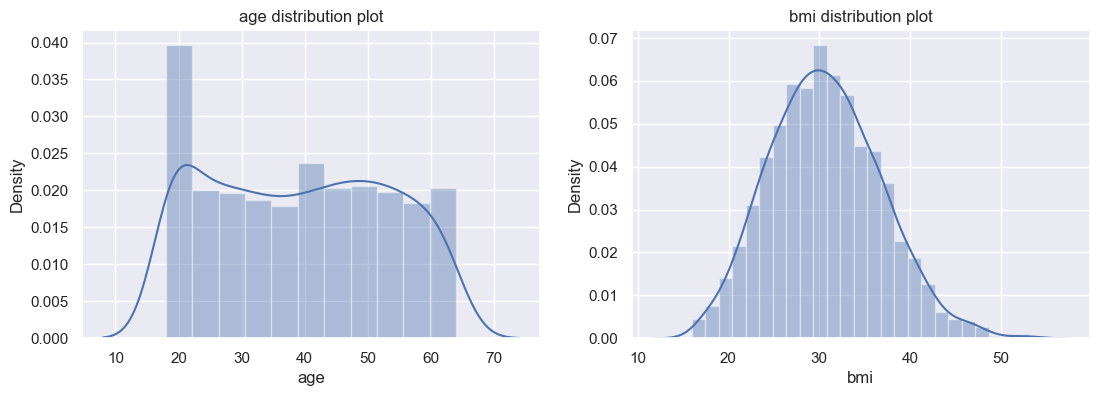

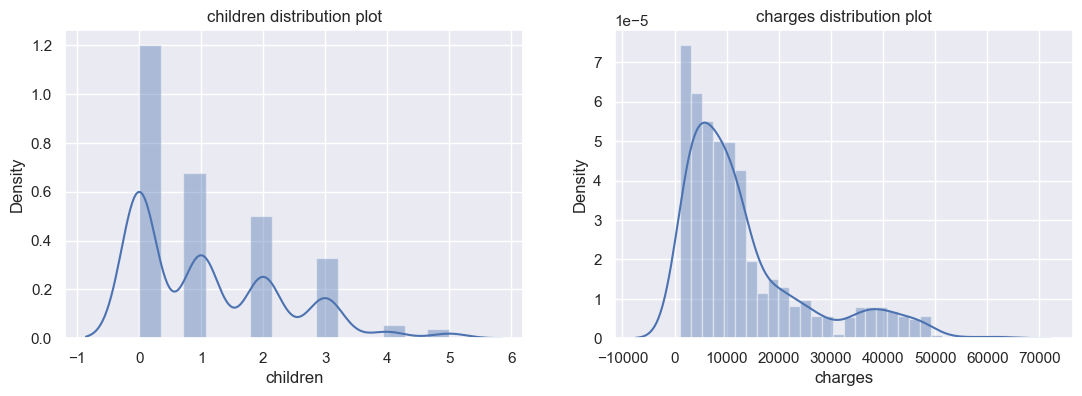

In [26]:
#Numeriical distribution of the Insurance columns
def plotter(data_frame, a, b ):
    plt.figure(figsize=(13, 4))
    sns.set(style = 'darkgrid')

    plt.subplot(1,2,1)
    sns.distplot(data[a])
    plt.title(f'{a} distribution plot')

    plt.subplot(1,2,2)
    sns.distplot(data[b])
    plt.title(f'{b} distribution plot')

plotter(num, 'age', 'bmi')
plotter(num, 'children',  'charges')

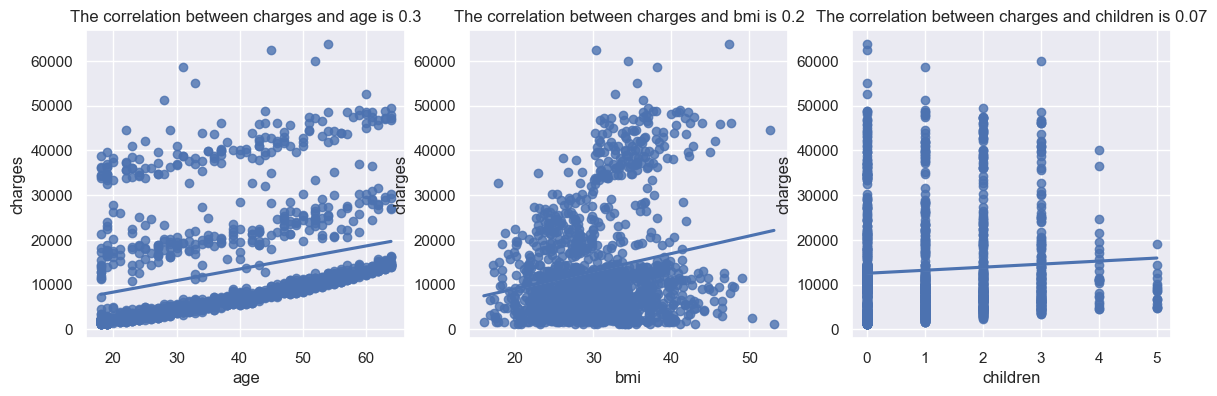

In [29]:
#Correlation between the numerical columns
def plotter(dataframe, a, b,c,  y):
    plt.figure(figsize = (14, 4))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.regplot(x = data[a], y = data[y], ci = 0)
    plt.title(f'The correlation between charges and {a} is {data[a].corr(data[y]).round(2)}')

    plt.subplot(1, 3, 2)
    sns.regplot(x = data[b], y = data[y], ci = 0)
    plt.title(f'The correlation between charges and {b} is {data[b].corr(data[y]).round(2)}')

    plt.subplot(1, 3, 3)
    sns.regplot(x = data[c], y = data[y], ci = 0)
    plt.title(f'The correlation between charges and {c} is {data[c].corr(data[y]).round(2)}')


plotter(num, 'age', 'bmi', 'children', 'charges')



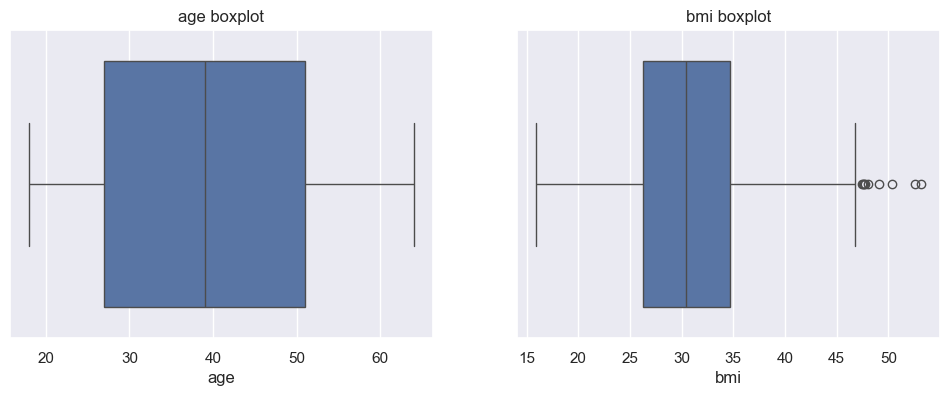

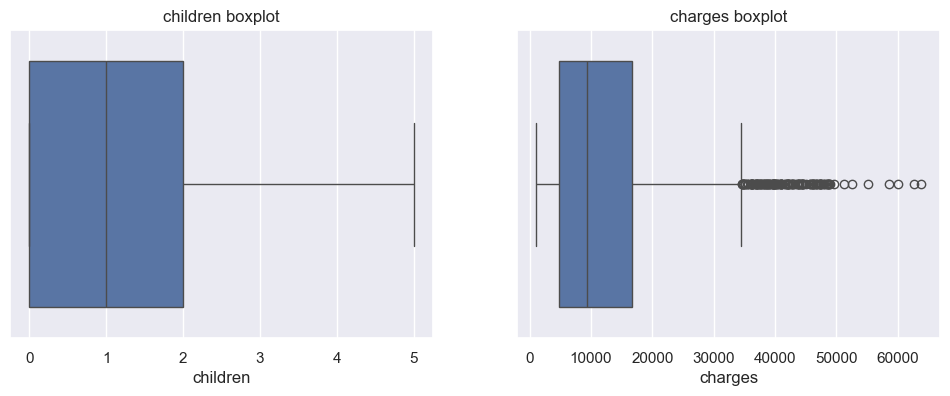

In [30]:
#outlier Removal 

def OutlierRemoval(dataframe, a, b):
    plt.figure(figsize = (12, 4))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 2, 1)
    sns.boxplot(x = data[a])
    plt.title(f'{a} boxplot')

    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[b])
    plt.title(f'{b} boxplot')  

OutlierRemoval(num, 'age', 'bmi')
OutlierRemoval(num, 'children', 'charges')


In [31]:
#from the chart, there are two columns with outliers which is the charges and BMI
num.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
num.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<Axes: xlabel='bmi'>

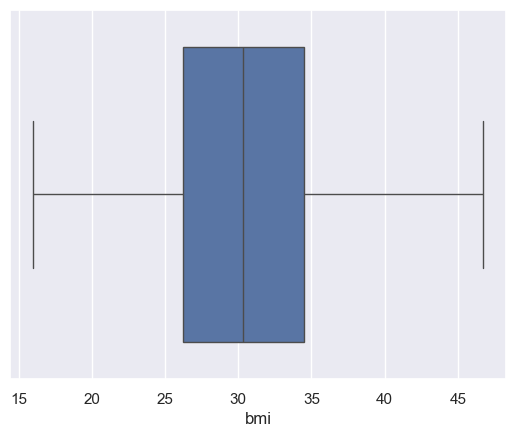

In [35]:
Q1 = data['bmi'].describe()[4]
Q3 = data['bmi'].describe()[6] 
IQR = Q3 - Q1 
lower_threhold_age = Q1 - 1.5 * IQR 
high_threhold_age = Q3 + 1.5 * IQR

#filter the part that falls between the threhold  
cv = num.loc[(data['bmi'] >= lower_threhold_age) & (data['bmi'] <= high_threhold_age)]

#plot the boxplot
sns.boxplot(x = cv.bmi)



<Axes: xlabel='charges'>

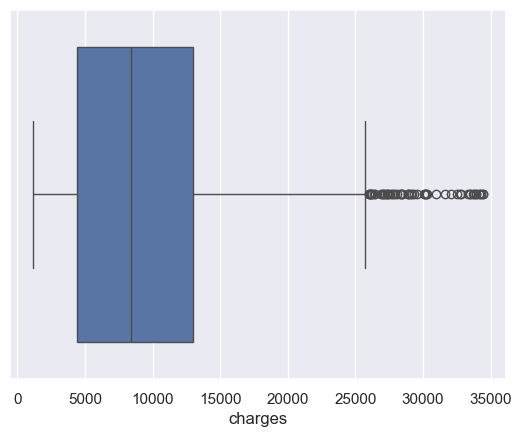

In [40]:
Q1 = data['charges'].describe()[4]
Q3 = data['charges'].describe()[6] 
IQR = Q3 - Q1 
lower_threhold_ages = Q1 - 1.5 * IQR 
high_threhold_ages = Q3 + 1.5 * IQR

#filter the part that falls between the threhold  
cv = num.loc[(data['charges'] >= lower_threhold_age) & (data['charges'] <= high_threhold_age)]

#plot the boxplot
sns.boxplot(x = cv['charges'])

Data Preprocessing


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
new_data = data.copy()
encoder = LabelEncoder()
scaler = StandardScaler()

for i in cat:
    if i in new_data.columns:
        new_data[i] = encoder.fit_transform(new_data[i])

for i in num.drop('charges', axis = 1):
    if i in new_data.columns:
        new_data[i] = scaler.fit_transform(new_data[[i]])

new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520


<Axes: >

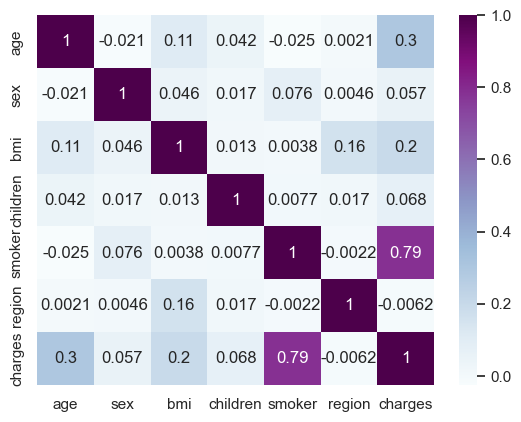

In [44]:
# MULTI- COLINEARITY
sns.heatmap(new_data.corr(), annot = True, cmap = 'BuPu')

Model Evaluation


In [45]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rff =RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
x = new_data.drop('charges', axis = 1)
y = new_data['charges']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.85, random_state = 42)
rff.fit(xtrain, ytrain)
ypred = rff.predict(xtrain)
print(r2_score(ypred, ytrain))



0.8702909185669929


In [46]:
test = rff.predict(xtest)
print(r2_score(test, ytest))

0.8628288380990508


In [50]:
output = pd.concat([xtest.reset_index(drop = True), ytest.reset_index(drop = True)], axis = 1)
output['Predicted'] = pd.Series(test)
output

,age,sex,bmi,children,smoker,region,charges,Predicted
0,0.412467,0,-0.900341,0.751079,0,0,9095.06825,10781.946581
1,-0.228344,0,-0.105546,-0.908614,0,1,5272.17580,5638.096620
2,1.765289,0,-0.619825,-0.908614,1,1,29330.98315,26521.049743
3,0.483668,1,-0.806836,1.580926,0,1,9301.89355,10505.468255
4,-1.438764,1,0.206139,-0.908614,1,1,33750.29180,34821.975880
...,...,...,...,...,...,...,...,...
196,-1.438764,0,-1.009431,-0.078767,0,1,2709.11190,4921.817641
197,1.053277,0,-0.292556,0.751079,0,0,12096.65120,13421.713044
198,-1.509965,0,-0.713331,-0.908614,0,0,2198.18985,2735.743948
199,0.768473,0,-0.830622,-0.908614,0,3,8932.08400,11052.697090


In [ ]:
#Importing the model 
import pickle 
pickle.dump(rff, open('rff.pkl', 'wb'))